## Decision boundary plotting

This notebook contains the code to plot 2D decision boundaries for models trained on both 2-dimensional and higher-dimensional data.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format="retina"

In [2]:
# set random seed
seed = 1
np.random.seed(seed)

# set cmap
cmap = "tab10"

### 1. Plotting decision boundaries for 2D data

In [3]:
# 1. create dummy binary classification dataset with 2 features
X, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=4.5, random_state=seed)
print("X:", X.shape)
print("y:", y.shape)

X: (500, 2)
y: (500,)


In [4]:
# 2. split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (375, 2)
y_train: (375,)
X_test: (125, 2)
y_test: (125,)


In [5]:
# 3. build and train models with different hyperparameters
n_neighbors = [1, 10, 20]
models = []
test_scores = []
for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("* KNN (n_neighbors={n}) test score: {s:.3f}".format(n=n, s=test_score))
    models.append(model)
    test_scores.append(test_score)

* KNN (n_neighbors=1) test score: 0.872
* KNN (n_neighbors=10) test score: 0.920
* KNN (n_neighbors=20) test score: 0.912


In [6]:
# 4. create background grid
pad = 0.5
resolution = 100
min_x1, max_x1 = np.min(X[:, 0]) - pad, np.max(X[:, 0]) + pad
min_x2, max_x2 = np.min(X[:, 1]) - pad, np.max(X[:, 1]) + pad
xx, yy = np.meshgrid(
    np.linspace(min_x1, max_x1, resolution),
    np.linspace(min_x2, max_x2, resolution),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
print("grid_points:", grid_points.shape)

grid_points: (10000, 2)


In [7]:
# 5. get each model's predictions on grid points
grid_predictions = []
for model in models:
    grid_predictions.append(model.predict(grid_points))

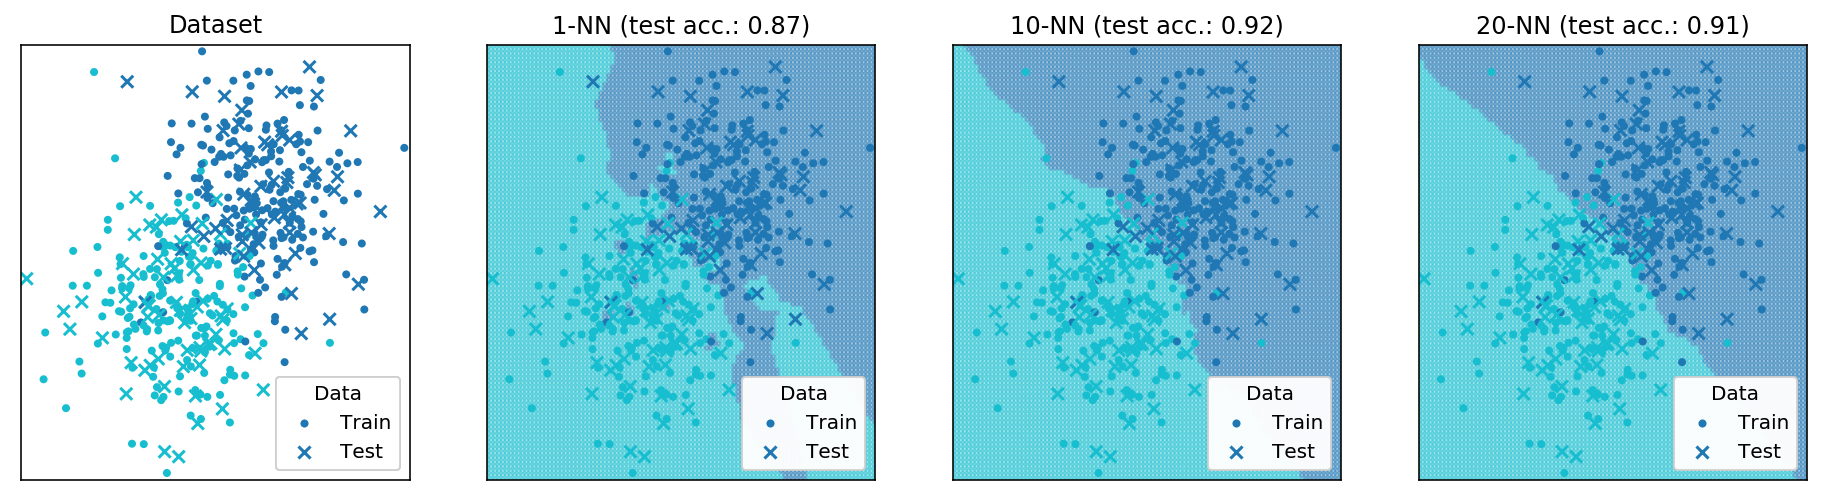

In [8]:
# 6. build visualisation
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax in axes:
    ax.set_xlim([min_x1, max_x1])
    ax.set_ylim([min_x2, max_x2])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
# plot dataset only
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[0].set_title("Dataset")
legend = axes[0].legend(loc="best", title="Data")
axes[0].add_artist(legend)

# plot model 1
axes[1].scatter(grid_points[:, 0], grid_points[:, 1], c=grid_predictions[0], cmap=cmap, alpha=0.4, s=4)
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[1].set_title("{n}-NN (test acc.: {s:.2f})".format(n=n_neighbors[0], s=test_scores[0]))
legend = axes[1].legend(loc="best", title="Data")
axes[1].add_artist(legend)

# plot model 2
axes[2].scatter(grid_points[:, 0], grid_points[:, 1], c=grid_predictions[1], cmap=cmap, alpha=0.4, s=4)
axes[2].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[2].set_title("{n}-NN (test acc.: {s:.2f})".format(n=n_neighbors[1], s=test_scores[1]))
legend = axes[2].legend(loc="best", title="Data")
axes[2].add_artist(legend)

# plot model 3
axes[3].scatter(grid_points[:, 0], grid_points[:, 1], c=grid_predictions[2], cmap=cmap, alpha=0.4, s=4)
axes[3].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[3].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[3].set_title("{n}-NN (test acc.: {s:.2f})".format(n=n_neighbors[2], s=test_scores[2]))
legend = axes[3].legend(loc="best", title="Data")
axes[3].add_artist(legend)

plt.show()

### 2. Plotting decision boundaries for higher-dimensional data

In [9]:
# 1. create dummy 4-class classification dataset with multiple features
X, y = make_blobs(n_samples=500, centers=4, n_features=6, 
                  cluster_std=4.5, random_state=seed)
print("X:", X.shape)
print("y:", y.shape)

X: (500, 6)
y: (500,)


In [10]:
# 2. transform original data into 2D
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
print("X_2d:", X_2d.shape)

X_2d: (500, 2)


In [11]:
# 3. split original and transformed data using same strategy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, random_state=seed)

In [12]:
# 4. build and train original model
model = SVC()
model.fit(X_train, y_train)
original_test_score = model.score(X_test, y_test)
print("Original model (SVC) test score: {s:.3f}".format(s=original_test_score))

Original model (SVC) test score: 0.872


In [13]:
# 5. get original model's predictions on training and test sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [14]:
# 6. build and train Voronoi model
voronoi = KNeighborsClassifier(n_neighbors=1)
voronoi = voronoi.fit(X_train_2d, train_pred)

In [15]:
# 7. check Voronoi's ability to predict original model behaviour on test set
voronoi_test_score = voronoi.score(X_test_2d, test_pred)
print("Voronoi can accurately predict orignal model's behaviour {p:.1f}% of the time.".format(p=voronoi_test_score*100))

Voronoi can accurately predict orignal model's behaviour 92.8% of the time.


In [16]:
# 8. create background grid
pad = 0.5
resolution = 100
min_x1, max_x1 = np.min(X_2d[:, 0]) - pad, np.max(X_2d[:, 0]) + pad
min_x2, max_x2 = np.min(X_2d[:, 1]) - pad, np.max(X_2d[:, 1]) + pad
xx, yy = np.meshgrid(
    np.linspace(min_x1, max_x1, resolution),
    np.linspace(min_x2, max_x2, resolution),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
print("grid_points:", grid_points.shape)

grid_points: (10000, 2)


In [17]:
# 9. get Voronoi predictions on grid points
voronoi_grid_predictions = voronoi.predict(grid_points)

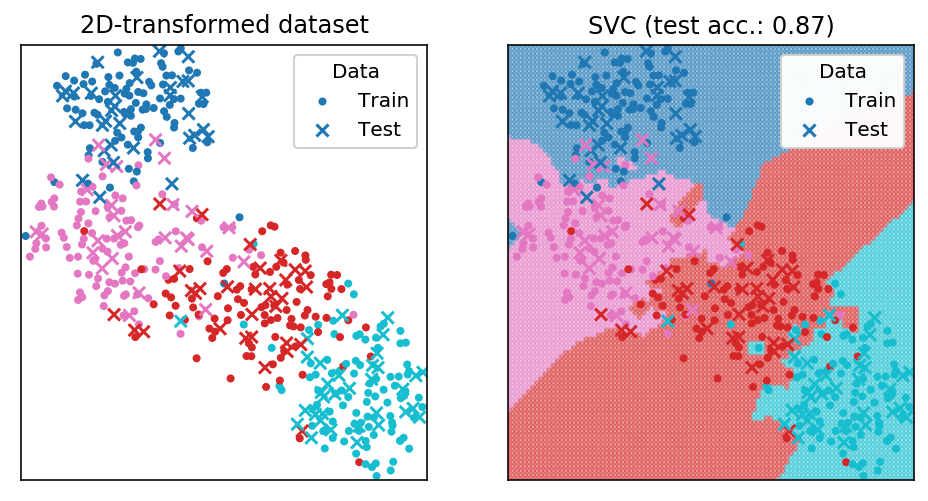

In [18]:
# 10. build visualization
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for ax in axes:
    ax.set_xlim([min_x1, max_x1])
    ax.set_ylim([min_x2, max_x2])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
# plot dataset only
axes[0].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[0].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[0].set_title("2D-transformed dataset")
legend = axes[0].legend(loc="best", title="Data")
axes[0].add_artist(legend)

# plot Voronoi-based decision boundaries
axes[1].scatter(grid_points[:, 0], grid_points[:, 1], c=voronoi_grid_predictions, cmap=cmap, alpha=0.4, s=4)
axes[1].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap, marker=".", label="Train")
axes[1].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap, marker="x", label="Test")
axes[1].set_title("SVC (test acc.: {s:.2f})".format(s=original_test_score))
legend = axes[1].legend(loc="best", title="Data")
axes[1].add_artist(legend)

plt.show()